# Best Markets for Advertising

In this scenario we are data analysts for an online e-learning company that specializes in programming courses. We cover domains such as data science, game development, but our primary focus is web and mobile development.
Our goal is to promote our products and invest money in more advertisement, but to do that we need to know what markets to advertise in.

It's costly to organize surveys, but to start with we can use a dataset from an e-learning platform called freeCodeCamp. In 2017 they performed a survey aimed at a new programmers. This survey is a good candidate to begin our analysis.

*https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969*

Github repository:
*https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data*


We want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use("fivethirtyeight")
%matplotlib inline

The first step in our analysis is to identify the appropriate columns that are relevant. Unfortunately there are over 100 columns which is far too many for a practical analysis.

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output 
csv = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory= False)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We can use the json file from the author's github repository page to identify useful and irrelevant columns. Unfortunately it's a rather manual and tedious process and there are far too many columns to list for deletion. Instead we'll sequentially drop slices of columns since we cannot drop lists and slices at the same time using python code.

In [3]:
# Index location of the first set of columns to drop
print(csv.columns.get_loc("CodeEventConferences"))
print(csv.columns.get_loc("CodeEventWorkshops"))

8
23


In [4]:
# Drops columns
csv = csv.drop(csv.iloc[:, 8:23], axis=1)

In [5]:
# Index location of the next set of columns to drop
print(csv.columns.get_loc("NetworkID"))
print(csv.columns.get_loc("ResourceW3S"))

59
100


In [6]:
csv = csv.drop(csv.iloc[:, 59:100], axis=1)

In [7]:
print(csv.columns.get_loc("YouTubeCodeCourse"))

63


In [8]:
# Drop remaining columns including index postion 63 and onward
csv = csv.drop(csv.iloc[:, 63:], axis=1)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [9]:
csv.info(memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   BootcampFinish                 1069 non-null   float64
 3   BootcampLoanYesNo              1079 non-null   float64
 4   BootcampName                   949 non-null    object 
 5   BootcampRecommend              1073 non-null   float64
 6   ChildrenNumber                 2314 non-null   float64
 7   CityPopulation                 15354 non-null  object 
 8   CodeEventWorkshops             1753 non-null   float64
 9   CommuteTime                    9246 non-null   object 
 10  CountryCitizen                 15382 non-null  object 
 11  CountryLive                    15336 non-null  object 
 12  EmploymentField                8116 non-null  

In [10]:
csv.iloc[:,:20]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,1.0,45 to 60 minutes,South Africa,South Africa,NaN,IT support and website update,Employed for wages,NaN,NaN,0.0,1.0,male
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,Less than 15 minutes,United Kingdom,United Kingdom,education,NaN,Employed for wages,NaN,NaN,0.0,NaN,male


If we utilize the following code below we'll get a better understanding of missing data in the columns. We expect for a lot of columns to be missing data, because there are likely many instances of respondents failing to enter information during the survey. 

In [11]:
#pd.set_option('display.max_rows', None)  # or 1000
series = csv.apply(pd.isnull).sum()/csv.shape[0] * 100

# Columns with less than or equal to 60% missing data points
list = series[series <= 60].index


In [12]:
print(series)

Age                  15.449794
AttendedBootcamp      2.563961
BootcampFinish       94.118294
BootcampLoanYesNo    94.063274
BootcampName         94.778542
                       ...    
MonthsProgramming     6.002751
ResourceW3S          46.272352
SchoolDegree         15.444292
SchoolMajor          51.983494
StudentDebtOwe       81.502063
Length: 63, dtype: float64


In [13]:
# Converts the list of columns we want to use from pandas.index to list
cols_to_use = pd.Index.tolist(list)
cols_to_use.append("JobRoleInterest")

In [14]:
# Isolates the dataframe down to only preferred columns
csv = csv[cols_to_use]

In [15]:
csv

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,JobRoleInterest
0,27.0,0.0,more than 1 million,15 to 29 minutes,Canada,Canada,software development and IT,Employed for wages,female,1.0,0.0,1.0,0.0,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,start your own business,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,Full-Stack Web Developer
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,"Front-End Web Developer, Back-End Web Develo..."
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,"Front-End Web Developer, Full-Stack Web Deve..."
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,"Full-Stack Web Developer, Information Security..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,more than 1 million,I work from home,Indonesia,Indonesia,software development and IT,Self-employed freelancer,male,1.0,1.0,0.0,0.0,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,Indonesian,married or domestic partnership,10.0,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN
18171,31.0,0.0,more than 1 million,Less than 15 minutes,Nigeria,Nigeria,transportation,Self-employed freelancer,male,1.0,1.0,0.0,0.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,work for a nonprofit,no preference,English,divorced,10000.0,1.0,NaN,high school diploma or equivalent (GED),NaN,"DevOps / SysAdmin, Mobile Developer, Pro..."
18172,39.0,0.0,more than 1 million,45 to 60 minutes,South Africa,South Africa,NaN,Employed for wages,male,1.0,1.0,0.0,0.0,10.0,6871d7f091c6541d3d0a6ebd159f31d2,f6fdd490538c1ae2f36acb1c4d8b829e,1000000.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,Zulu,married or domestic partnership,19.0,3.0,1.0,some high school,NaN,NaN
18173,54.0,0.0,"between 100,000 and 1 million",Less than 15 minutes,United Kingdom,United Kingdom,education,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,2ebc31e984139abf0e45b431920fa70d,a

In [16]:
# Drop id.x and id.y columns
csv = csv.drop(columns=["ID.x","ID.y"])

In [17]:
nulls = csv.apply(pd.isnull).sum()/csv.shape[0] * 100
nulls = nulls.sort_values()

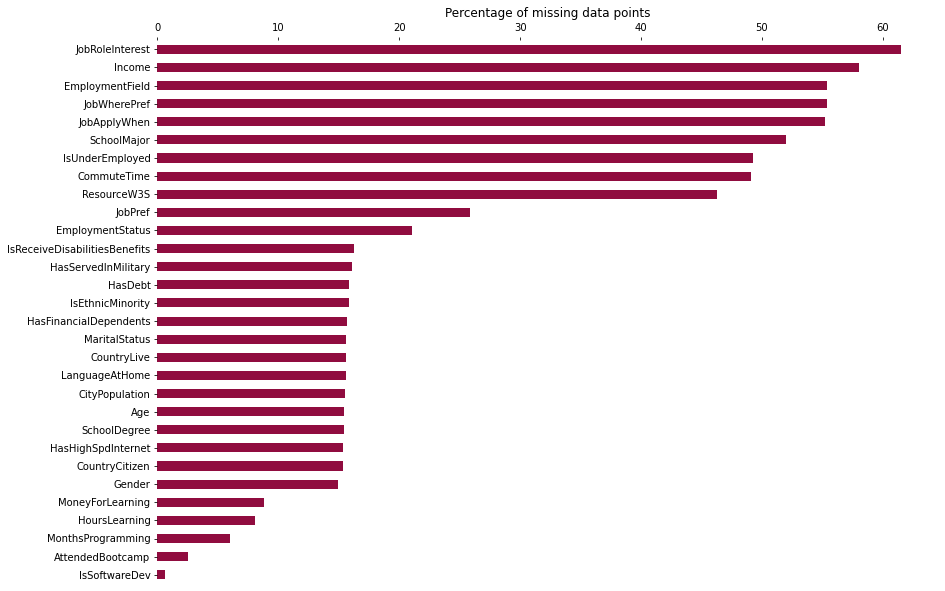

In [18]:
fig, ax = plt.subplots(figsize = (14, 10))
nulls.plot(kind = "barh", color = "#900C3F")
plt.title("Percentage of missing data points")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
plt.show()

In [19]:
csv["JobRoleInterest"].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                